# Song Recommender Test

In [1]:
import numpy as np
import sys
from IPython.display import display
import seaborn as sns
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle

In [2]:
import os
os.environ['SPOTIPY_CLIENT_ID']=''
os.environ['SPOTIPY_CLIENT_SECRET']=''
os.environ['SPOTIPY_REDIRECT_URI']= 'http://localhost/callback/'

In [3]:
scope = "user-library-read playlist-modify-public playlist-modify-private"
username = 'INSERT_YOUR_USERNAME'
token = util.prompt_for_user_token(username,scope,redirect_uri='http://localhost/callback/')

In [4]:
spotify = spotipy.Spotify(auth=token)

In [5]:
def show_get_audio_features_track(track):
    '''Get audio features of a specific track'''
    audio_features = spotify.audio_features(track['id'])
    
    features_list = []
    for features in audio_features:
        features_list.append(([features['energy'], features['liveness'],
                              features['tempo'], features['speechiness'],
                              features['acousticness'], features['instrumentalness'],
                              features['time_signature'], features['danceability'],
                              features['key'], features['duration_ms'],
                              features['loudness'], features['valence'],
                              features['mode'], features['type'],
                              features['uri']]))
        
    df = pd.DataFrame(features_list, columns=['energy', 'liveness',
                                              'tempo', 'speechiness',
                                              'acousticness', 'instrumentalness',
                                              'time_signature', 'danceability',
                                              'key', 'duration_ms', 'loudness',
                                              'valence', 'mode', 'type', 'uri'])
    display(df)
    reduced_df = df.iloc[:, [0,1,3,4,5,7,11]] #valence
    reduced_df = reduced_df 
    ax = reduced_df.iloc[0].plot.bar()
    plt.tight_layout()
    title = "Audio Features for Track: " + track['name']
    plt.title(title)
    plt.savefig('hammer_smashed_face.png')
    plt.show()
    
    detail_df = df.iloc[:, [2,8,10,12]]
    return detail_df, df

## Load Model

In [6]:
# load model
filename = 'final_model.sav'
svm = pickle.load(open(filename, 'rb'))

## Predict if a specific track would fit into my Playlist

In [7]:
def predict(uri):
    track = spotify.track(uri)
    print("Song name: ", track['name'])
    
    # get audio features
    details, track_features = show_get_audio_features_track(track)
    track_features = track_features.iloc[:, [0,1,2,3,4,5,6,7,8,10,12]]
    y_pred = svm.predict(track_features)
    
    if y_pred == 0:
        print("You won't like that song!")
    else:
        print("Add the song to your playlist!")

Song name:  Baby


,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri
0,0.859,0.111,65.043,0.137,0.0401,0,4,0.728,5,214240,-5.237,0.535,0,audio_features,spotify:track:6epn3r7S14KUqlReYr77hA


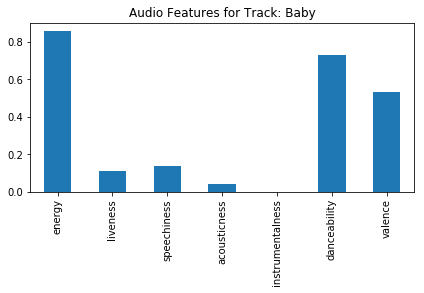

You won't like that song!


In [8]:
# sample songs
metallica_uri = 'spotify:track:2R6UrJ8uWbSIiHWmvRQvN8'
pack_uri = 'spotify:track:33QVVUvGhQzA8rGUj0NOtY'
hammer_uri = 'spotify:track:0X5ZCVx1fCh3jIwNsSYpp7'
justin_bieber_uri = 'spotify:track:6epn3r7S14KUqlReYr77hA'

predict(justin_bieber_uri)

### Compare with all Songs

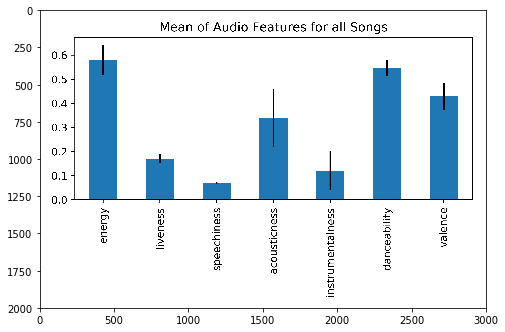

In [9]:
mean_plot = plt.imread('mean_plot.png')
plt.figure(figsize=(8, 6))
plt.imshow(mean_plot)
plt.show()

## Personal Result  

- I'm agreeing with the displayed track predicition but I'm not fully convinced about the model performance
- for a "real" result, the model accuracy should be higher and more songs are needed
- problem: negative data used could be biased because I only searched for specific musical directions to get enough data $\rightarrow$ looking for pop music that I don't like would take longer because of the manual selection
- Are the audio features enough and how were they labeled (see my BPM surprise in "train_spotify_music.ipynb")?
- musical taste is not easy to describe and sometimes, you might not even know why you like the song $\rightarrow$ musical taste is more complex $\Rightarrow$ more complex methods are needed but this feature based methods is a good starting point to get an impression